In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_suicide.csv")
df.head()

,indicator,unit,unit_num,demographic_group,stub_name_num,stub_label,stub_label_num,year,year_num,age_group,age_num,death_rate_estimate,flag
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [3]:
df.shape

(5484, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   indicator            5484 non-null   object 
 1   unit                 5484 non-null   object 
 2   unit_num             5484 non-null   int64  
 3   demographic_group    5484 non-null   object 
 4   stub_name_num        5484 non-null   int64  
 5   stub_label           5484 non-null   object 
 6   stub_label_num       5484 non-null   float64
 7   year                 5484 non-null   int64  
 8   year_num             5484 non-null   int64  
 9   age_group            5484 non-null   object 
 10  age_num              5484 non-null   float64
 11  death_rate_estimate  5484 non-null   float64
 12  flag                 0 non-null      float64
dtypes: float64(4), int64(4), object(5)
memory usage: 557.1+ KB


In [5]:
df.describe()

,unit_num,stub_name_num,stub_label_num,year,year_num,age_num,death_rate_estimate,flag
count,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,0.0
mean,1.868162,4.390226,4.456999,1999.677972,24.406637,2.658352,13.709810,NaN
std,0.338345,2.053227,1.837295,13.584097,11.689499,1.921269,11.531805,NaN
min,1.000000,0.000000,0.000000,1950.000000,1.000000,0.000000,0.300000,NaN
25%,2.000000,3.000000,3.152000,1991.000000,15.000000,0.000000,5.000000,NaN
50%,2.000000,5.000000,5.114000,2002.000000,26.000000,3.000000,10.500000,NaN
75%,2.000000,6.000000,6.130000,2010.000000,34.000000,4.100000,19.500000,NaN
max,2.000000,11.000000,7.235000,2018.000000,42.000000,6.000000,74.800000,NaN


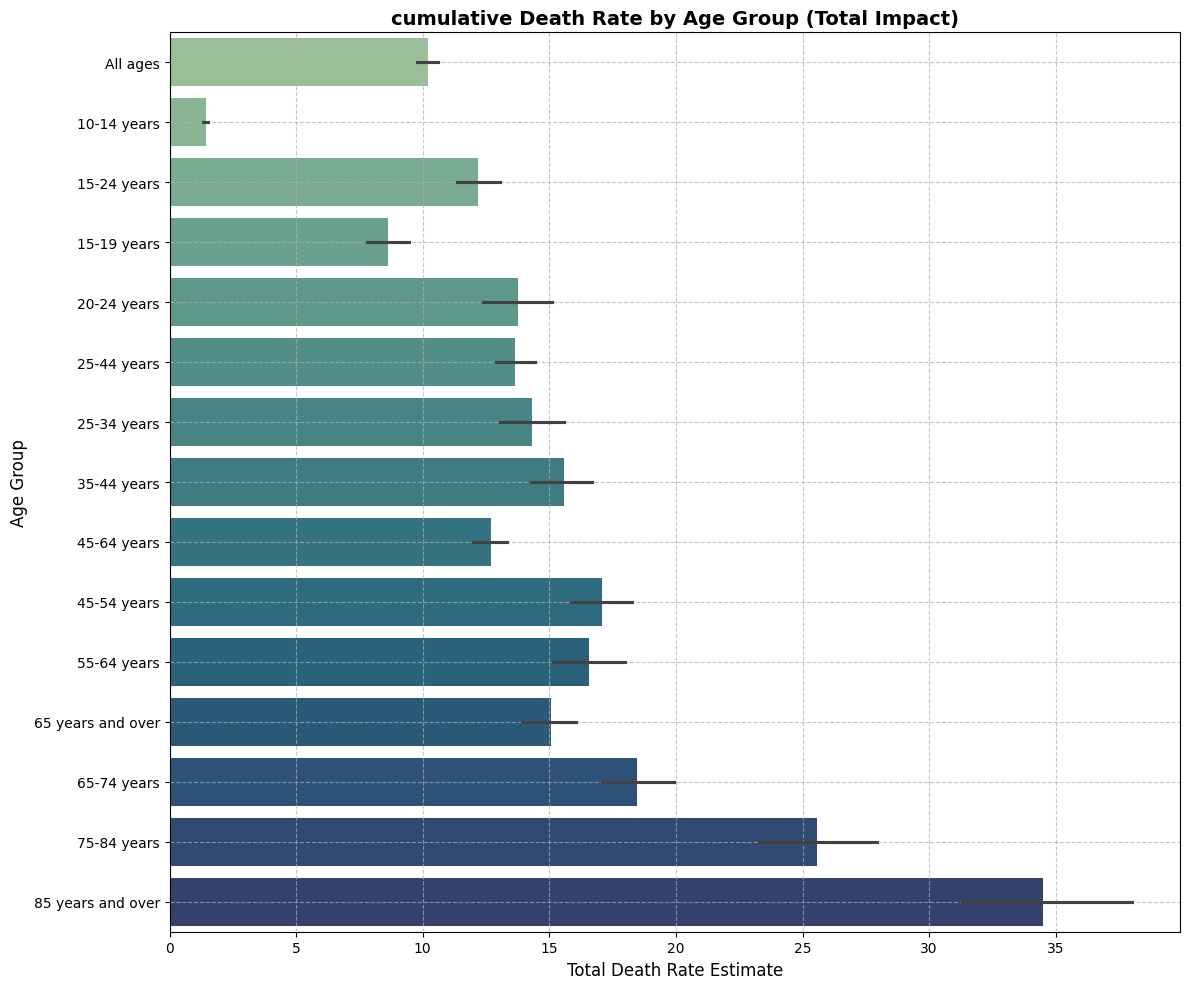

In [13]:
plt.figure(figsize = (12,10))
sns.barplot(data = df, x = 'death_rate_estimate', y = 'age_group', hue='age_group', dodge=False, legend = False, palette = 'crest')


plt.title("cumulative Death Rate by Age Group (Total Impact)", fontsize = 14, weight = 'bold')
plt.xlabel("Total Death Rate Estimate", fontsize = 12)
plt.ylabel("Age Group", fontsize = 12)
plt.grid(True, linestyle = "--", alpha = 0.7)
plt.tight_layout()
plt.show()

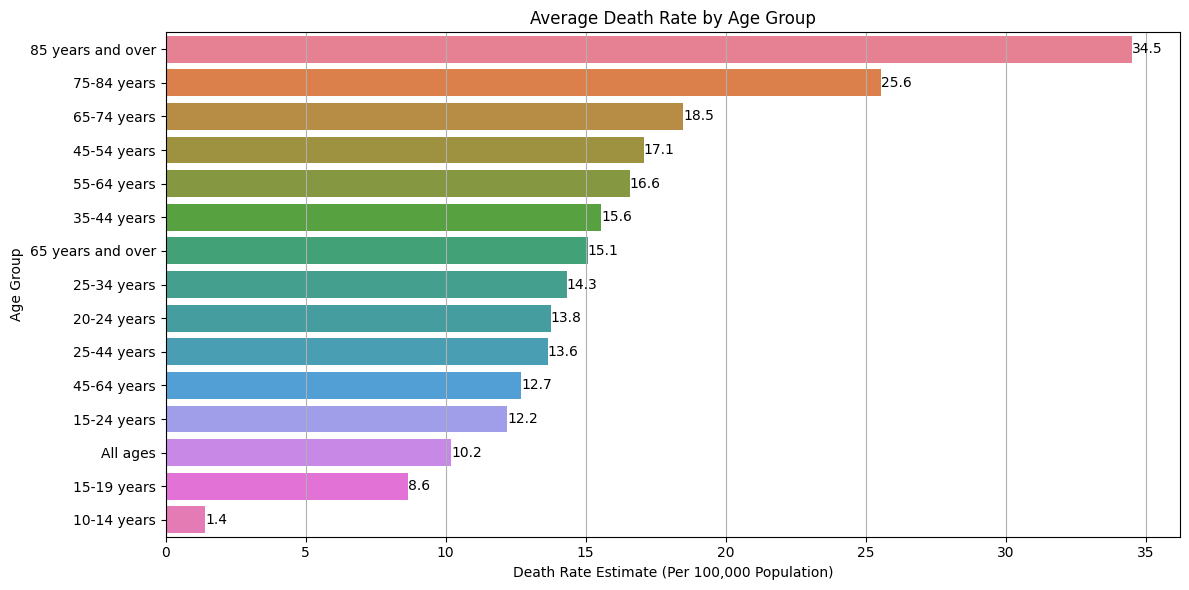

In [14]:

df_age = df.groupby('age_group')['death_rate_estimate'].mean().reset_index().sort_values(by='death_rate_estimate', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(data=df_age, x='death_rate_estimate', y='age_group', hue='age_group', legend=False)


for index, value in enumerate(df_age['death_rate_estimate']):
    plt.text(value, index, f"{value:.1f}", va='center')


plt.title("Average Death Rate by Age Group")
plt.xlabel("Death Rate Estimate (Per 100,000 Population)")
plt.ylabel("Age Group")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


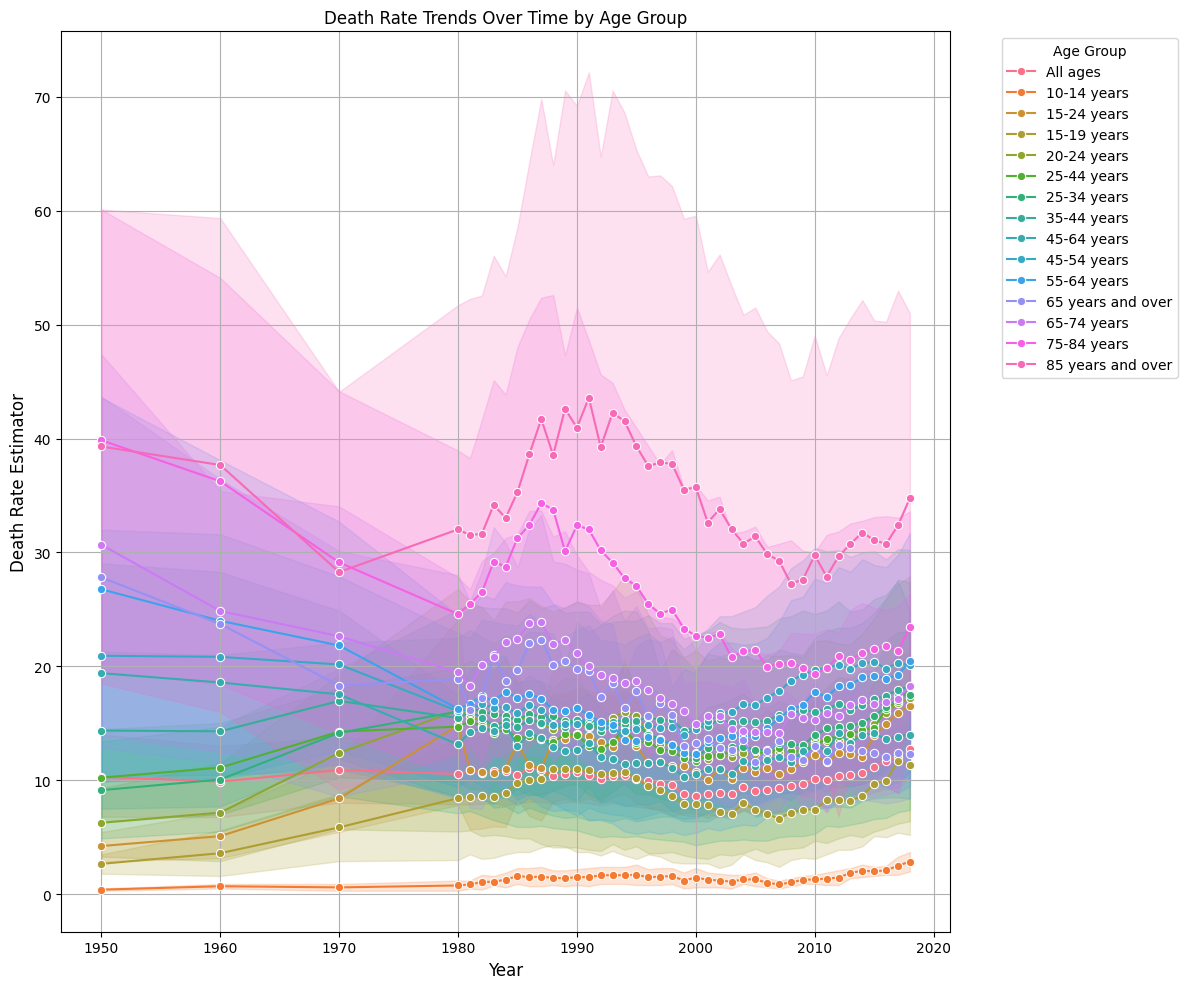

In [15]:
plt.figure(figsize = (12,10))
sns.lineplot(data = df, x = 'year', y = 'death_rate_estimate', hue='age_group', marker = 'o')


plt.title("Death Rate Trends Over Time by Age Group")
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Death Rate Estimator", fontsize = 12)
plt.legend(title = 'Age Group', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(True)
plt.tight_layout()
plt.show()